# Concrete Strength Predictor Project

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [93]:
data = pd.read_excel("concreteData.xls")
data # Data Loading

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [94]:
concrete = pd.DataFrame(data)
concrete # Creating a DataFrame from the loaded data


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [95]:
concrete.info()
concrete.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [96]:
# Calculating the correlation matrix
corr = concrete.corr()
print(corr)

                                                    Cement (component 1)(kg in a m^3 mixture)  \
Cement (component 1)(kg in a m^3 mixture)                                            1.000000   
Blast Furnace Slag (component 2)(kg in a m^3 mi...                                  -0.275193   
Fly Ash (component 3)(kg in a m^3 mixture)                                          -0.397475   
Water  (component 4)(kg in a m^3 mixture)                                           -0.081544   
Superplasticizer (component 5)(kg in a m^3 mixt...                                   0.092771   
Coarse Aggregate  (component 6)(kg in a m^3 mix...                                  -0.109356   
Fine Aggregate (component 7)(kg in a m^3 mixture)                                   -0.222720   
Age (day)                                                                            0.081947   
Concrete compressive strength(MPa, megapascals)                                      0.497833   

                             

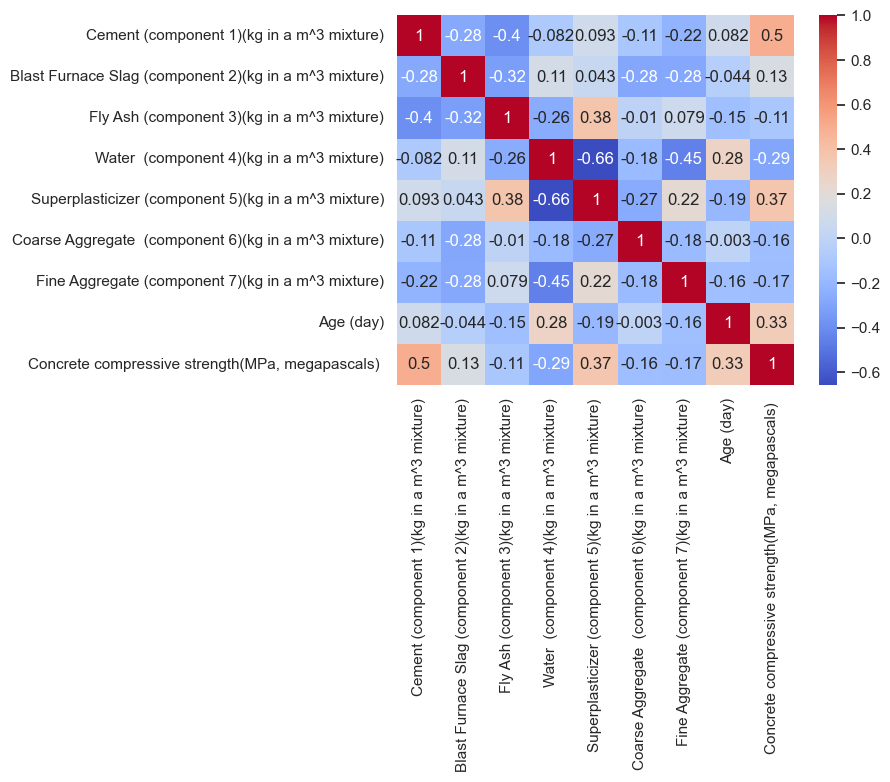

In [97]:
# Visualizing the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')  
plt.show()

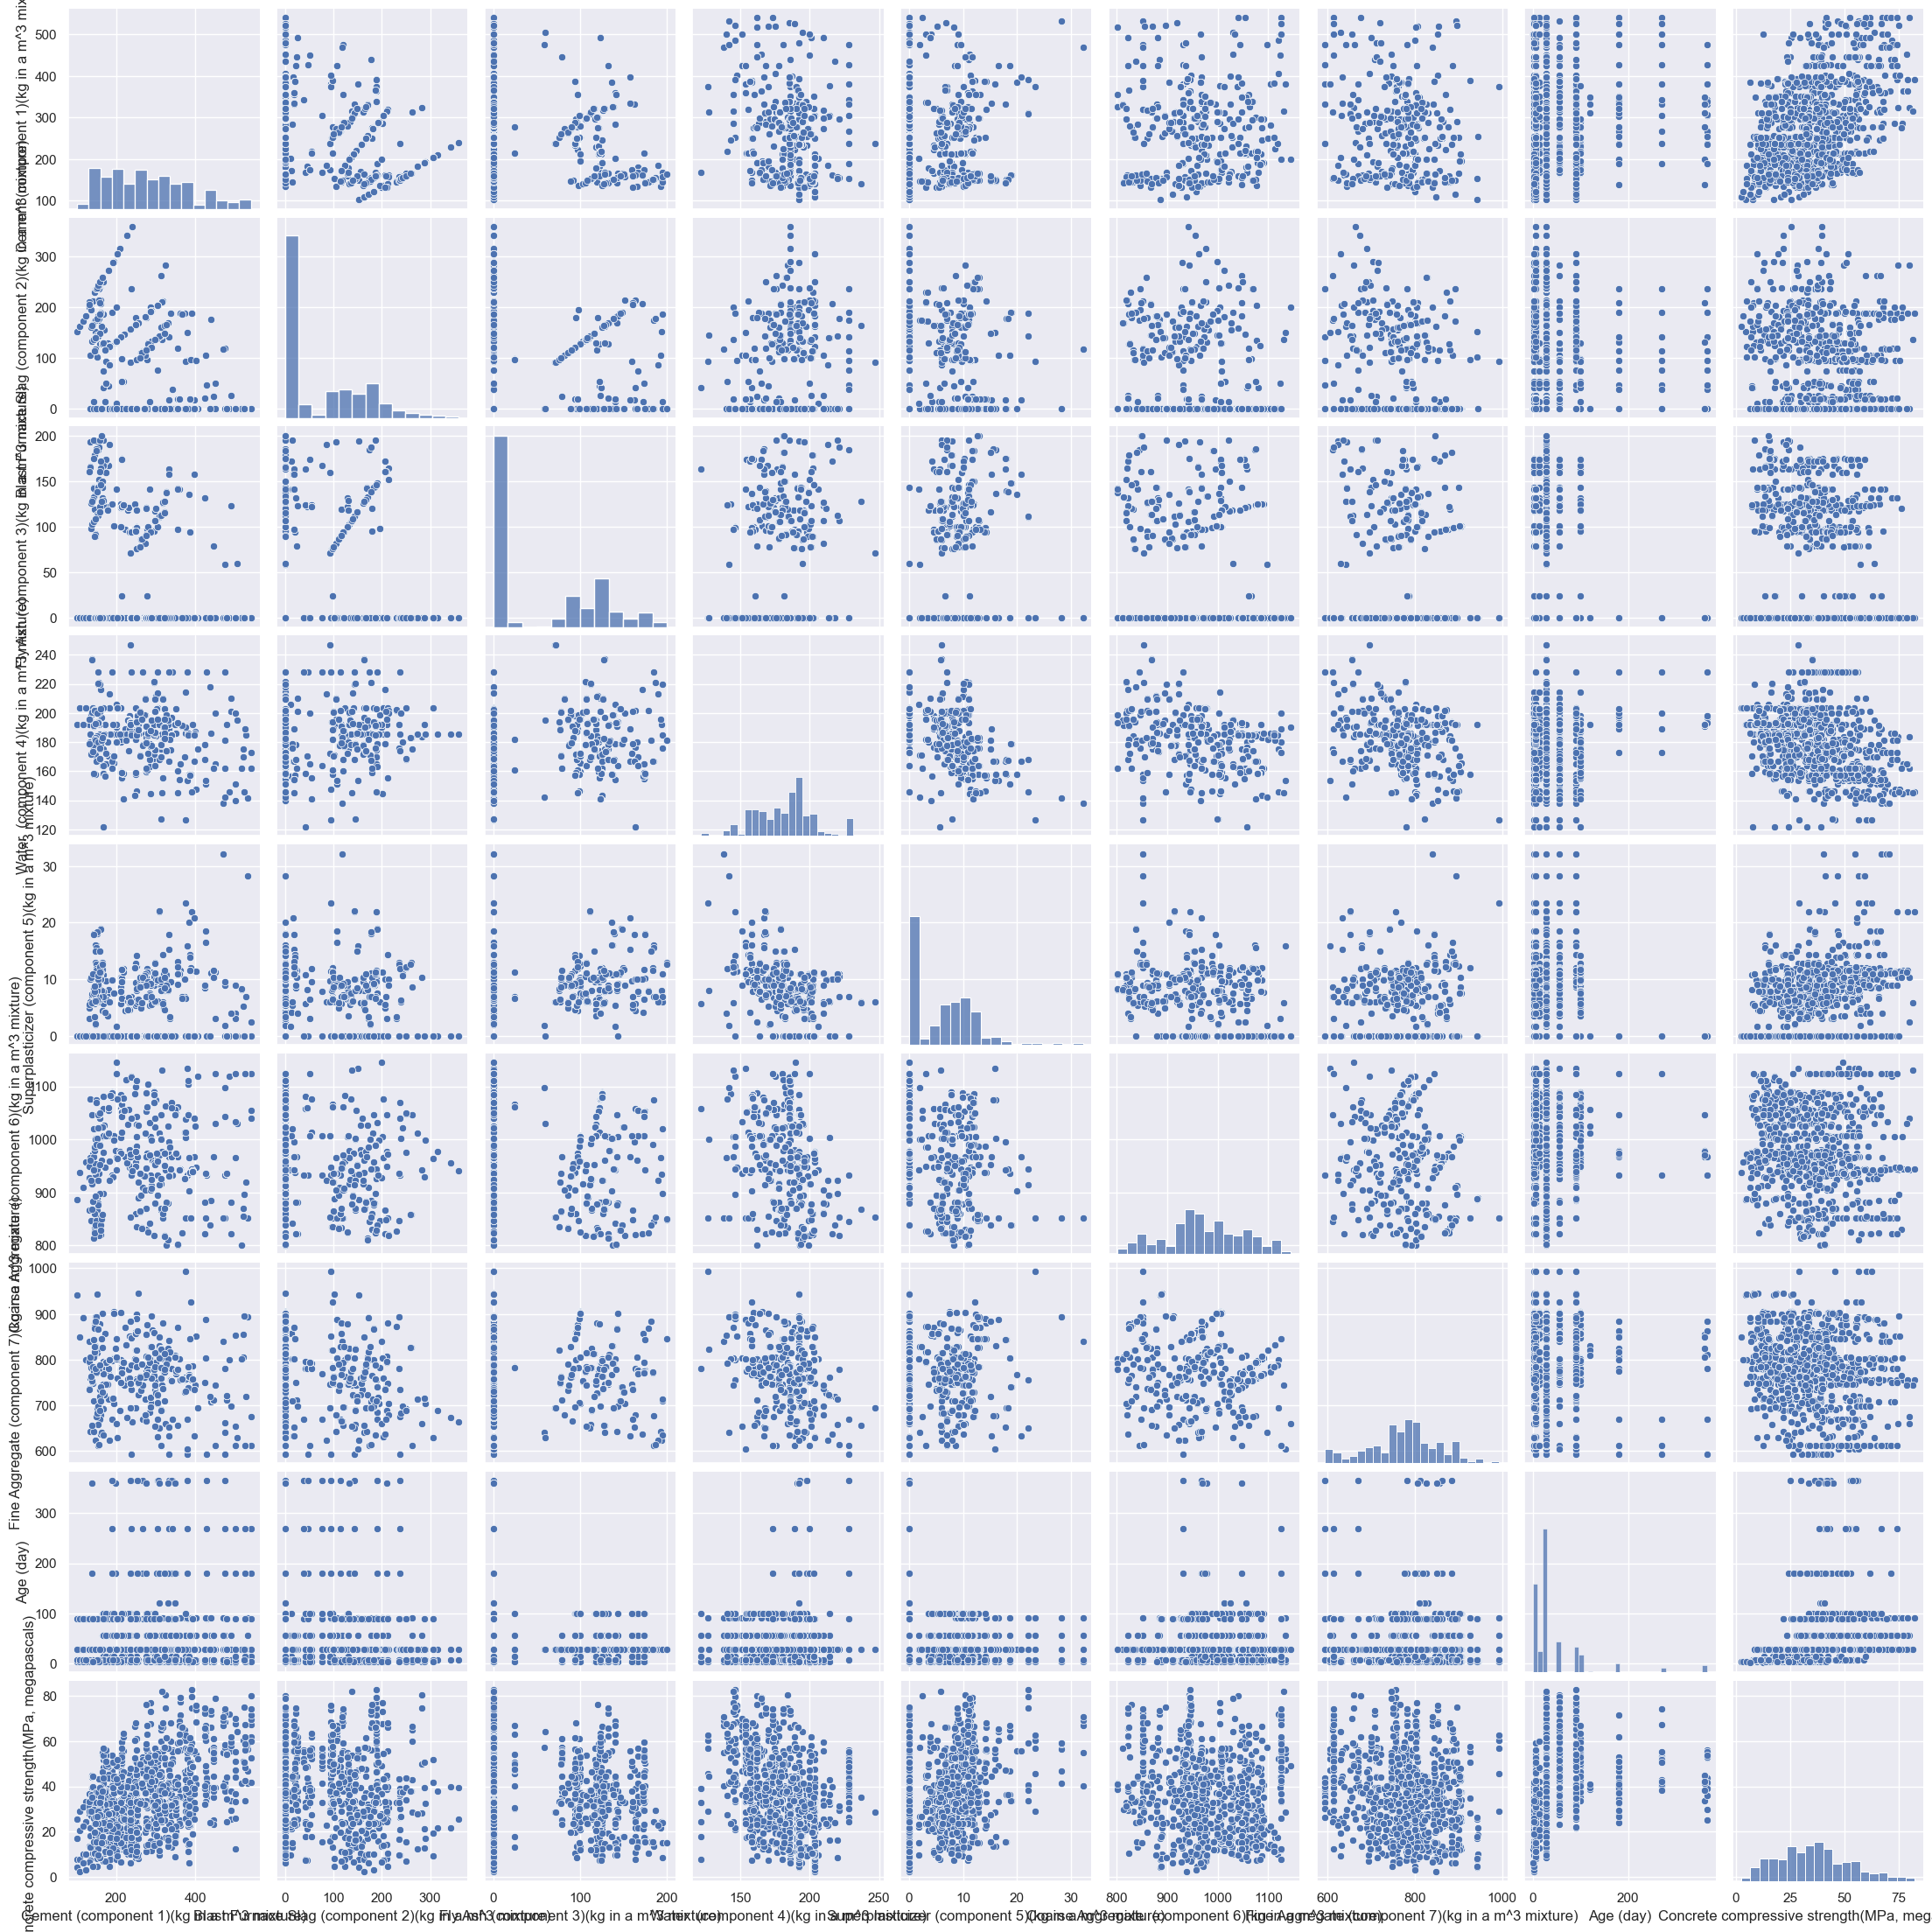

In [98]:
sns.pairplot(concrete)
plt.show()

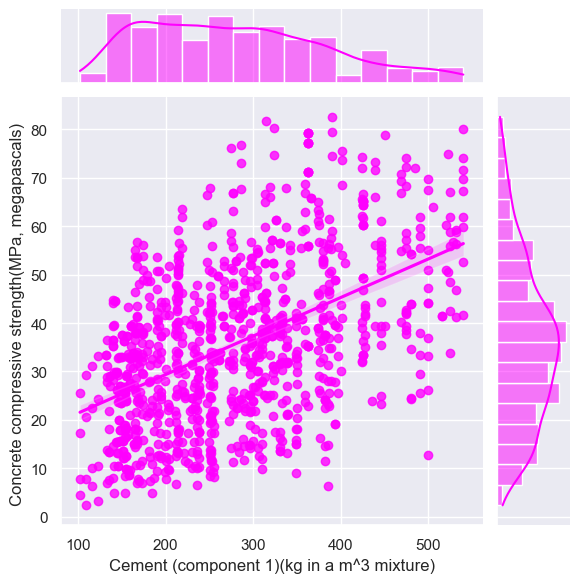

In [100]:
cols = concrete.columns
color = ['magenta', 'khaki', 'mediumorchid', 'cornflowerblue', 'crimson', 'orangered', 'navy', 'salmon']
sns.set(font_scale=1)

sns.jointplot(data=concrete, x=cols[0], y=cols[-1], kind='reg', color=color[0])
plt.show()



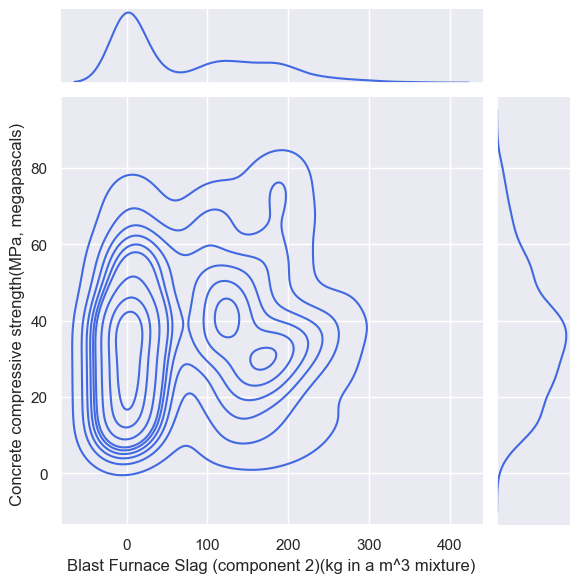

In [101]:

sns.set(font_scale=1)
sns.jointplot(data=concrete, x=cols[1], y=cols[-1], kind='kde', color='royalblue')
plt.show()


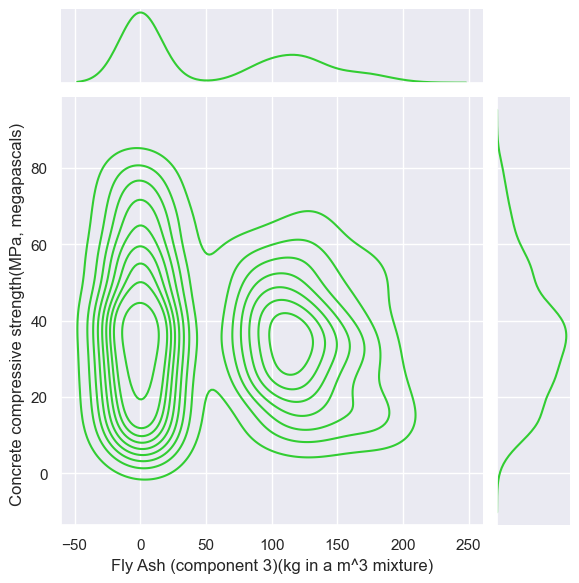

In [102]:

sns.set(font_scale=1)
sns.jointplot(data=concrete, x=cols[2], y=cols[-1], kind='kde', color='limegreen')
plt.show()


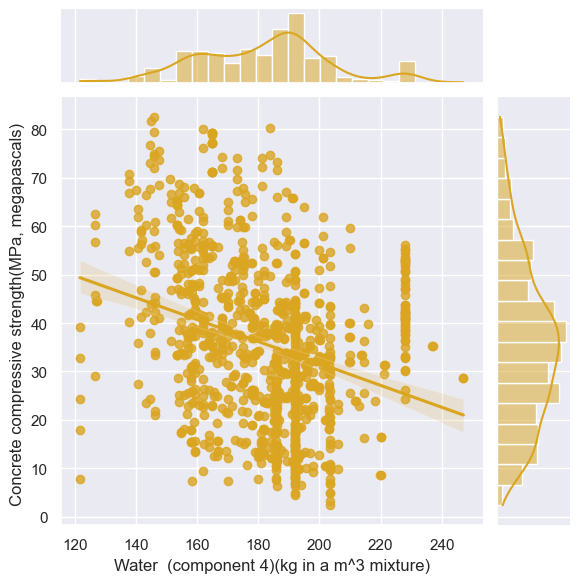

In [103]:
sns.set(font_scale=1)
sns.jointplot(data=concrete, x=cols[3], y=cols[-1], kind='reg', color='goldenrod')
plt.show()


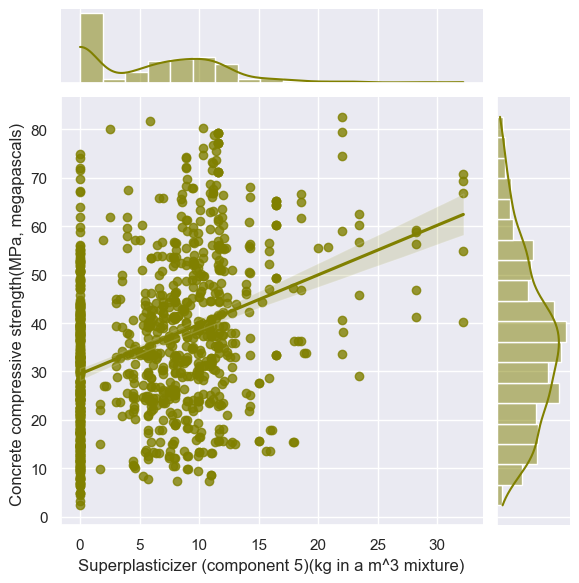

In [104]:
sns.set(font_scale=1)
sns.jointplot(data=concrete, x=cols[4], y=cols[-1], kind='reg', color='olive')
plt.show()


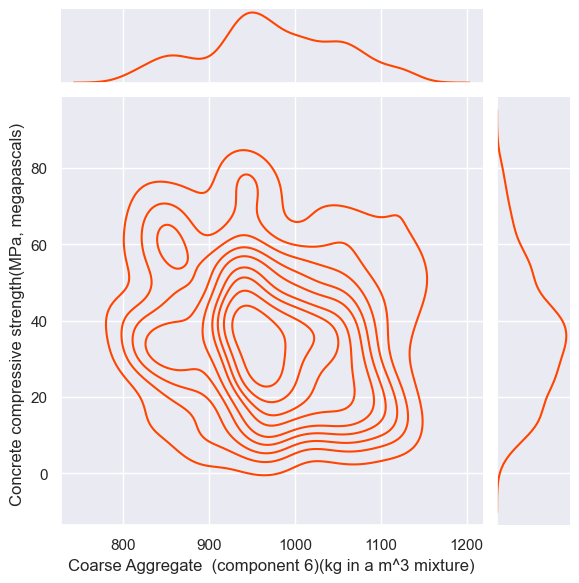

In [105]:
sns.jointplot(data=concrete, x=cols[5], y=cols[-1]
,kind='kde',color=color[5])
plt.show()

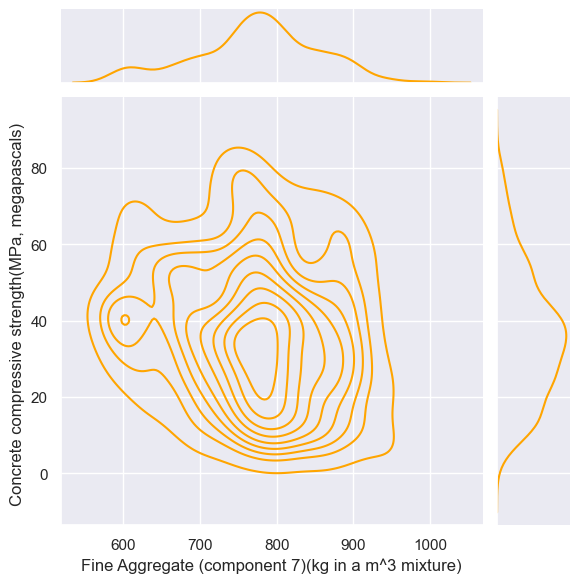

In [106]:
sns.set(font_scale=1)
sns.jointplot(data=concrete, x=cols[6], y=cols[-1], kind='kde', color='orange')
plt.show()


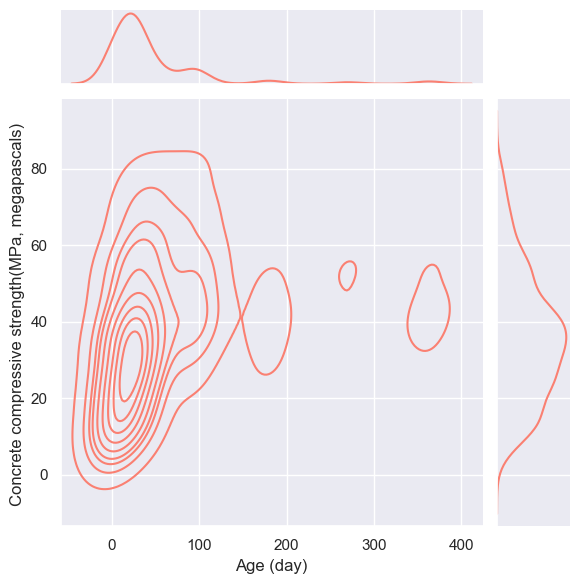

In [107]:
sns.jointplot(data=concrete, x=cols[7], y=cols[-1]
,kind='kde',color=color[7])
plt.show()

In [108]:
# Data Standardization
# Importing necessary modules from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error



In [109]:
# Standardizing the features
features = concrete.iloc[:, :-1].to_numpy()
features_standardized = StandardScaler().fit_transform(features)
features_standardized

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [110]:
# Separating the target variable
target = concrete.iloc[:, -1]
target

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [111]:
X=features_standardized
X

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [112]:
y=target
y


0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [113]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.25)

# --- Model Training and Evaluation ---
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_pred, y_test))


Linear Regression MSE: 116.34044298966384


In [114]:
# ElasticNet Model
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("ElasticNet MSE:", mean_squared_error(y_pred, y_test))


ElasticNet MSE: 148.30787099214086


In [115]:
# Ridge Regression Model
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_pred, y_test))


Ridge Regression MSE: 116.32678412371511


In [116]:
# Lasso Regression Model
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_pred, y_test))


Lasso Regression MSE: 131.28347234445005


In [117]:
# Importing necessary libraries for model training and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

116.38399686419416

In [118]:
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

149.3752138142446

In [119]:
y_test

329     23.524921
1002    57.218234
888     19.008853
885     26.227667
706     26.322815
          ...    
252     38.327971
80      33.398217
841     30.123206
1028    32.768036
337     56.847296
Name: Concrete compressive strength(MPa, megapascals) , Length: 258, dtype: float64

In [120]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

116.2695185756131

In [121]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

131.38754903924627

In [122]:
features_standardized

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [123]:
val_data = {'Cement': [175.0, 320.0, 320.0, 320.0, 530.0],
'BlastFurnaceSlag': [13.0, 0.0, 0.0, 73.0, 359.0],
'FlyAsh': [172.0, 0.0, 126.0, 54.0, 200.0],
'CoarseAggregate': [1000.0, 970.0, 860.0, 972.0, 1145.0],
'FineAggregate': [856.0, 850.0, 856.0, 773.0, 992.0],
'Water': [156.0, 192.0, 209.0, 181.0, 247.0],
'Superplasticizer': [4.0, 0.0, 5.7, 6.0, 32.0],
'Age': [3.0, 7.0, 28.0, 45.0, 365.0]}
# Create a dataframe from the dictionary
validation_set = pd.DataFrame(val_data)
val_data=StandardScaler().fit_transform(validation_set)

In [124]:
validation_set

,Cement,BlastFurnaceSlag,FlyAsh,CoarseAggregate,FineAggregate,Water,Superplasticizer,Age
0,175.0,13.0,172.0,1000.0,856.0,156.0,4.0,3.0
1,320.0,0.0,0.0,970.0,850.0,192.0,0.0,7.0
2,320.0,0.0,126.0,860.0,856.0,209.0,5.7,28.0
3,320.0,73.0,54.0,972.0,773.0,181.0,6.0,45.0
4,530.0,359.0,200.0,1145.0,992.0,247.0,32.0,365.0


In [125]:
model=Ridge()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

116.2695185756131

In [80]:
model.predict(val_data)

array([ 10.15573699,  15.23687705,  31.15953885,  23.34552105,
       100.51105637])

In [126]:
# Using the first row to check if our interface is correct or not
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_excel("concreteData.xls")
df.head() 

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from IPython.display import display, HTML

concrete_data = pd.read_excel("concreteData.xls")
scaler = StandardScaler()
X = scaler.fit_transform(concrete_data.iloc[:, :-1])
y = concrete_data.iloc[:, -1]
model = Ridge()
model.fit(X, y)

# Define a function for user input and prediction

def predict_strength(cement, blast_furnace_slag, fly_ash, coarse_aggregate, fine_aggregate, water, superplasticizer, age):
    mixture = np.array([[cement, blast_furnace_slag, fly_ash, coarse_aggregate, fine_aggregate, water, superplasticizer, age]])
    standardized_mixture = scaler.transform(mixture)
    predicted_strength = model.predict(standardized_mixture)[0]
    std_error = np.sqrt(mean_squared_error(model.predict(X), y))
    return f"Estimated Concrete Strength: {predicted_strength:.2f} MPa<br>Uncertainty in Estimate: ±{std_error:.2f} MPa"

# Create sliders for each input
cement_slider = widgets.FloatSlider(min=0, max=600, step=10, description='Cement:')
slag_slider = widgets.FloatSlider(min=0, max=400, step=10, description='Blast Furnace Slag:')
ash_slider = widgets.FloatSlider(min=0, max=400, step=10, description='Fly Ash:')
coarse_aggregate_slider = widgets.FloatSlider(min=800, max=1200, step=10, description='Coarse Aggregate:')
fine_aggregate_slider = widgets.FloatSlider(min=600, max=1000, step=10, description='Fine Aggregate:')
water_slider = widgets.FloatSlider(min=100, max=250, step=5, description='Water:')
superplasticizer_slider = widgets.FloatSlider(min=0, max=50, step=1, description='Superplasticizer:')
age_slider = widgets.IntSlider(min=1, max=365, step=1, description='Age (days):')

# Display all sliders
display(cement_slider, slag_slider, ash_slider, coarse_aggregate_slider, fine_aggregate_slider, water_slider, superplasticizer_slider, age_slider)

# Button to run the prediction function
predict_button = widgets.Button(description="Predict Strength")
output = widgets.Output()
display(predict_button, output)

def on_button_clicked(b):
    with output:
        output.clear_output()  # Clear the previous output
        result = predict_strength(cement_slider.value, slag_slider.value, ash_slider.value, coarse_aggregate_slider.value, fine_aggregate_slider.value, water_slider.value, superplasticizer_slider.value, age_slider.value)
        display(HTML(result))  # Display new output

predict_button.on_click(on_button_clicked)


FloatSlider(value=0.0, description='Cement:', max=600.0, step=10.0)

FloatSlider(value=0.0, description='Blast Furnace Slag:', max=400.0, step=10.0)

FloatSlider(value=0.0, description='Fly Ash:', max=400.0, step=10.0)

FloatSlider(value=800.0, description='Coarse Aggregate:', max=1200.0, min=800.0, step=10.0)

FloatSlider(value=600.0, description='Fine Aggregate:', max=1000.0, min=600.0, step=10.0)

FloatSlider(value=100.0, description='Water:', max=250.0, min=100.0, step=5.0)

FloatSlider(value=0.0, description='Superplasticizer:', max=50.0, step=1.0)

IntSlider(value=1, description='Age (days):', max=365, min=1)

Button(description='Predict Strength', style=ButtonStyle())

Output()